# Binary Classification

This jupyter notebook is used to do analytical and predictive tasks according to binary classification

## Import libraries

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import joblib

In [82]:
df = pd.read_csv('../Phase_1/train.csv')

In [83]:
df.columns

Index(['flight_number', 'airline_name', 'type', 'status',
       'departure_iata_code', 'departure_icao_code',
       'departure_scheduled_time', 'departure_actual_time',
       'arrival_iata_code', 'arrival_icao_code', 'arrival_estimated_time',
       'Month', 'Day', 'Temperature (°F)_max', 'Temperature (°F)_avg',
       'Temperature (°F)_min', 'Dew Point (°F)_max', 'Dew Point (°F)_avg',
       'Dew Point (°F)_min', 'Humidity (%)_max', 'Humidity (%)_avg',
       'Humidity (%)_min', 'Wind Speed (mph)_max', 'Wind Speed (mph)_avg',
       'Wind Speed (mph)_min', 'Pressure (in)_max', 'Pressure (in)_avg',
       'Pressure (in)_min', 'delay_time', 'day_of_week', 'hour_of_day'],
      dtype='object')

In [84]:
features = list(df.columns)
needed_features = [features[1],features[2],features[3],features[4],features[5]]
needed_features.extend(features[11:])

In [61]:
df_train = df[needed_features]

## First of all how do i encode the airline_name.

The method i used is to first of all leave the top 10 airlines as it is and make the other airlines be set as "other".

Then i will do one hot encoding.

In [77]:
top_10_airlines = df_train['airline_name'].value_counts().head(10).index
df_train['airline_name'] = df_train['airline_name'].apply(lambda x: x if x in top_10_airlines else 'other')

/tmp/ipykernel_2919/808971418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['airline_name'] = df_train['airline_name'].apply(lambda x: x if x in top_10_airlines else 'other')


In [81]:
one_hot_encoded = pd.get_dummies(df_train['airline_name'], prefix='airline')
df_train = pd.concat([df_train, one_hot_encoded], axis=1)

## Now i will one hot encode the day_of_week column

In [84]:
one_hot_days = pd.get_dummies(df_train['day_of_week'], prefix='day')
df_train = pd.concat([df_train, one_hot_days], axis=1)

## Now i will one hot encode the Month column

In [86]:
one_hot_months = pd.get_dummies(df_train['Month'], prefix='month')
df_train = pd.concat([df_train, one_hot_months], axis=1)

In [89]:
df_train.columns

Index(['airline_name', 'type', 'status', 'departure_iata_code',
       'departure_icao_code', 'Month', 'Day', 'Temperature (°F)_max',
       'Temperature (°F)_avg', 'Temperature (°F)_min', 'Dew Point (°F)_max',
       'Dew Point (°F)_avg', 'Dew Point (°F)_min', 'Humidity (%)_max',
       'Humidity (%)_avg', 'Humidity (%)_min', 'Wind Speed (mph)_max',
       'Wind Speed (mph)_avg', 'Wind Speed (mph)_min', 'Pressure (in)_max',
       'Pressure (in)_avg', 'Pressure (in)_min', 'delay_time', 'day_of_week',
       'hour_of_day', 'airline_airblue', 'airline_airsial',
       'airline_british airways', 'airline_emirates', 'airline_flyjinnah',
       'airline_klm', 'airline_oman air', 'airline_other',
       'airline_pakistan international airlines', 'airline_qatar airways',
       'airline_serene air', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'mo

## Now i will one hot encode the departure_icao_code column

In [93]:
df_train['departure_icao_code'].nunique()

3

In [94]:
one_hot_icaos = pd.get_dummies(df_train['departure_icao_code'], prefix='icao')
df_train = pd.concat([df_train, one_hot_icaos], axis=1)

## Now i will one hot encode the departure_iata_code column

In [97]:
df_train['departure_iata_code'].nunique()

3

In [98]:
one_hot_iata = pd.get_dummies(df_train['departure_iata_code'], prefix='iata')
df_train = pd.concat([df_train, one_hot_iata], axis=1)

## Now i will one hot encode the status column

In [102]:
df_train['status'].nunique()

3

In [103]:
one_hot_status = pd.get_dummies(df_train['status'], prefix='status')
df_train = pd.concat([df_train, one_hot_status], axis=1)

## Saving encoded data to csv

In [105]:
df_train.to_csv('encoded_train.csv',index=False)

# Start from here if continuing...

## Now we will start preparing data to feed into our model

In [85]:
df = pd.read_csv('encoded_train.csv')
df.head()

,airline_name,type,status,departure_iata_code,departure_icao_code,Month,Day,Temperature (°F)_max,Temperature (°F)_avg,Temperature (°F)_min,...,month_Sep,icao_opis,icao_opkc,icao_opla,iata_isb,iata_khi,iata_lhe,status_active,status_cancelled,status_unknown
0,airblue,departure,active,lhe,opla,Jan,31,61,56.8,52,...,False,False,False,True,False,False,True,True,False,False
1,flyjinnah,departure,active,lhe,opla,Jan,25,54,46.2,41,...,False,False,False,True,False,False,True,True,False,False
2,other,departure,active,lhe,opla,Jan,27,68,57.1,43,...,False,False,False,True,False,False,True,True,False,False
3,flyjinnah,departure,active,lhe,opla,Jan,19,57,47.4,41,...,False,False,False,True,False,False,True,True,False,False
4,other,departure,active,lhe,opla,Jan,25,54,46.2,41,...,False,False,False,True,False,False,True,True,False,False


## Replace negative delay times with zero

In [86]:
df['delay_time'] = df['delay_time'].clip(lower=0)

## Now fill nan values of active flight with mean

In [87]:
df['delay_time'].mean()

np.float64(13.484575669570829)

In [88]:
df.loc[df['status'] == 'active', 'delay_time'] = df.loc[df['status'] == 'active', 'delay_time'].fillna(
    df.loc[df['status'] == 'active', 'delay_time'].mean()
)

In [89]:
df['delay_time'].isnull().sum()

np.int64(3664)

## Now fill nan values of cancelled and unknown flight with -1

In [90]:
df.fillna({'delay_time':-1},inplace=True)

In [91]:
df['delay_time'].mean()

np.float64(12.455500100399428)

In [92]:
df['delay_time'].isnull().sum()

np.int64(0)

## Now make a final dataframe

In [93]:
df.columns

Index(['airline_name', 'type', 'status', 'departure_iata_code',
       'departure_icao_code', 'Month', 'Day', 'Temperature (°F)_max',
       'Temperature (°F)_avg', 'Temperature (°F)_min', 'Dew Point (°F)_max',
       'Dew Point (°F)_avg', 'Dew Point (°F)_min', 'Humidity (%)_max',
       'Humidity (%)_avg', 'Humidity (%)_min', 'Wind Speed (mph)_max',
       'Wind Speed (mph)_avg', 'Wind Speed (mph)_min', 'Pressure (in)_max',
       'Pressure (in)_avg', 'Pressure (in)_min', 'delay_time', 'day_of_week',
       'hour_of_day', 'airline_airblue', 'airline_airsial',
       'airline_british airways', 'airline_emirates', 'airline_flyjinnah',
       'airline_klm', 'airline_oman air', 'airline_other',
       'airline_pakistan international airlines', 'airline_qatar airways',
       'airline_serene air', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'mo

In [94]:
final_df = df[['Temperature (°F)_max',
       'Temperature (°F)_avg', 'Temperature (°F)_min', 'Dew Point (°F)_max',
       'Dew Point (°F)_avg', 'Dew Point (°F)_min', 'Humidity (%)_max',
       'Humidity (%)_avg', 'Humidity (%)_min', 'Wind Speed (mph)_max',
       'Wind Speed (mph)_avg', 'Wind Speed (mph)_min', 'Pressure (in)_max',
       'Pressure (in)_avg', 'Pressure (in)_min', 'delay_time',
       'hour_of_day', 'airline_airblue', 'airline_airsial',
       'airline_british airways', 'airline_emirates', 'airline_flyjinnah',
       'airline_klm', 'airline_oman air', 'airline_other',
       'airline_pakistan international airlines', 'airline_qatar airways',
       'airline_serene air', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'icao_opis', 'icao_opkc', 'icao_opla',
       'iata_isb', 'iata_khi', 'iata_lhe', 'status_active', 'status_cancelled',
       'status_unknown']]

## Convert delay_time to delay_time_binary

In [95]:
final_df['delay_time_binary'] = final_df['delay_time'].apply(lambda x: 1 if x > 0 or x == -1 else 0)

/tmp/ipykernel_2016/3673816209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['delay_time_binary'] = final_df['delay_time'].apply(lambda x: 1 if x > 0 or x == -1 else 0)


In [96]:
final_df['delay_time_binary'].value_counts()

delay_time_binary
1    46971
0     4601
Name: count, dtype: int64

## As we can see our 1 is a majority class so what we will do now is do oversampling on the minority class i.e 0.

Oversampling the minority class can create a more balanced dataset

In [97]:
final_df.drop(columns='delay_time',inplace=True)

/tmp/ipykernel_2016/3954856768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns='delay_time',inplace=True)


In [98]:
X = final_df.drop(columns="delay_time_binary")
y = final_df['delay_time_binary']
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['delay_time_binary'] = y_resampled

In [99]:
df_resampled['delay_time_binary'].value_counts()

delay_time_binary
1    46971
0    46971
Name: count, dtype: int64

## Convert to X and y variables

In [100]:
X = df_resampled.drop(columns="delay_time_binary")
y = df_resampled['delay_time_binary']

In [101]:
y.value_counts()

delay_time_binary
1    46971
0    46971
Name: count, dtype: int64

## Prediction Making and analysis

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
y_pred = model.predict(X_test)

## Evaluation Metrics

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.880249081909628


In [107]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.8392452830188679
Recall: 0.9421732683753442
F1-Score: 0.8877357549146792


In [108]:
class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
print(f'Class-wise Precision: {class_precision}')
print(f'Class-wise Recall: {class_recall}')
print(f'Class-wise F1-Score: {class_f1}')

Class-wise Precision: [0.93332519 0.83924528]
Class-wise Recall: [0.81769552 0.94217327]
Class-wise F1-Score: [0.87169252 0.88773575]


In [109]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7643 1704]
 [ 546 8896]]


In [110]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      9347
           1       0.84      0.94      0.89      9442

    accuracy                           0.88     18789
   macro avg       0.89      0.88      0.88     18789
weighted avg       0.89      0.88      0.88     18789



## Save the model for future use

In [111]:
joblib.dump(model, 'binary_models/logistic_regression_model.pkl')

['binary_models/logistic_regression_model.pkl']

## Now i will do PCA on my model then use Logistic Regression

In [112]:
scaler = StandardScaler().fit(X)
X_standardized = scaler.transform(X)
joblib.dump(scaler,'scaler_models/standard_scaler.pkl')

['scaler_models/standard_scaler.pkl']

In [113]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_standardized)
print(f'Number of Principal Components: {len(pca.explained_variance_ratio_)}')
print(f'Explained Variance Ratio:\n {pca.explained_variance_ratio_}')

Number of Principal Components: 34
Explained Variance Ratio:
 [0.14216318 0.07285358 0.0551357  0.04986465 0.03839164 0.0339681
 0.03233634 0.02504147 0.02373127 0.02310296 0.02279542 0.02258402
 0.02189227 0.0213535  0.02131145 0.0208833  0.0203013  0.01984538
 0.01970818 0.01964718 0.01947679 0.01933315 0.01887382 0.01870344
 0.01837249 0.01822305 0.0179846  0.01760534 0.01755901 0.01705408
 0.0164126  0.01607942 0.01511531 0.01455829]


In [114]:
print(f"X's shape before PCA : {X.shape}")
print(f"X's shape after PCA : {X_pca.shape}")

X's shape before PCA : (93942, 55)
X's shape after PCA : (93942, 34)


## Now time for prediction again after PCA

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [116]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [117]:
y_pred = model.predict(X_test)

## Evaluation Metrics after PCA

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8636436212677631


In [119]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.8293757181156645
Recall: 0.9173903833933489
F1-Score: 0.8711656441717791


In [120]:
class_precision, class_recall, class_f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
print(f'Class-wise Precision: {class_precision}')
print(f'Class-wise Recall: {class_recall}')
print(f'Class-wise F1-Score: {class_f1}')

Class-wise Precision: [0.90653086 0.82937572]
Class-wise Recall: [0.80935059 0.91739038]
Class-wise F1-Score: [0.85518879 0.87116564]


In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[7565 1782]
 [ 780 8662]]


In [122]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      9347
           1       0.83      0.92      0.87      9442

    accuracy                           0.86     18789
   macro avg       0.87      0.86      0.86     18789
weighted avg       0.87      0.86      0.86     18789



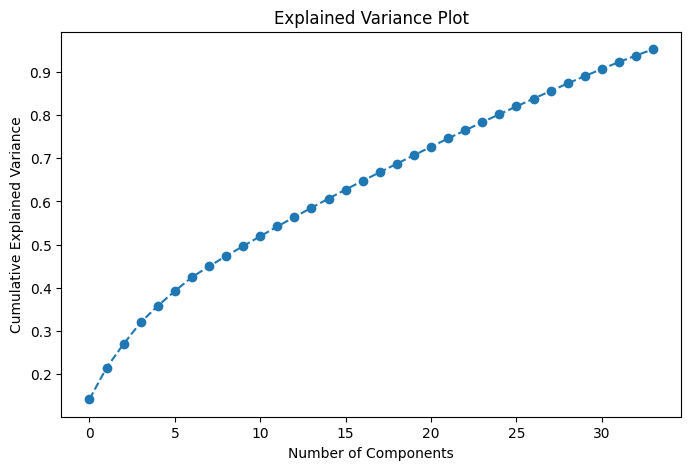

In [123]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Plot')
plt.show()

In [124]:
joblib.dump(model,'binary_models/logistic_regression_model_with_PCA.pkl')

['binary_models/logistic_regression_model_with_PCA.pkl']